In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch import nn
from skimage.measure import compare_ssim as ssim

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
transform = transforms.ToTensor()
trainset = datasets.MNIST('', download=True, train=True, transform=transform)
testset = datasets.MNIST('',download=True, train=False, transform=transform)
trainset,valset=torch.utils.data.random_split(trainset,(50000,10000))
trainloader = torch.utils.data.DataLoader(trainset,batch_size=500)
valloader = torch.utils.data.DataLoader(valset,batch_size=500)
testloader = torch.utils.data.DataLoader(testset,batch_size=500)

In [ ]:
class CNN(nn.Module):
    def __init__(self):
      super(CNN, self).__init__()
      self.flt1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
      self.flt2 = nn.Sequential(
          nn.MaxPool2d(kernel_size=2, stride=2),
          nn.ReLU())
      self.flt3 = nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1)
      self.flt4 = nn.Sequential(
          nn.MaxPool2d(kernel_size=2, stride=2),
          nn.ReLU())
      self.flt5 = nn.Sequential(
          nn.Linear(7 * 7 * 32, 500),
          nn.ReLU(),
          nn.Linear(500, 10))
       
    def forward(self, x):
      out = self.flt1(x)
      out = self.flt2(out)
      out = self.flt3(out)
      out = self.flt4(out)
      out = out.reshape(out.size(0), -1)
      out = self.flt5(out)
      return out

In [ ]:
LearningRate=0.001
epochs=5

In [ ]:
model1=CNN()
criterion1 = nn.CrossEntropyLoss()
optimizer1 = torch.optim.Adam(model1.parameters(), lr=LearningRate)

trainingloss_list = []
validationloss_list = []
validationaccuracy_list = []

for epoch in range(epochs):
  for images, labels in trainloader:
      outputs = model1(images.float())
      loss = criterion1(outputs, labels)
      trainingloss_list.append(loss.item())

      optimizer1.zero_grad()
      loss.backward()
      optimizer1.step()

  iteration=0
  tempvalloss=0
  correctval=0    
  
  for images, labels in valloader:
    outputs = model1(images.float())
    loss = criterion1(outputs, labels)
    _, predicted = torch.max(outputs.data, 1)
    correctval += (predicted == labels).sum().item()
    iteration+=1
    tempvalloss+=loss.item()
            
  validationloss_list.append(tempvalloss/iteration)
  validationaccuracy_list.append(correctval/100)
  print('Epoch',epoch+1,'out of',epochs,'epochs are over')
  
plt.figure(1)
xtrainloss=np.arange(len(trainingloss_list))
plt.plot(xtrainloss,trainingloss_list)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.title('Training Loss vs Iterations')

plt.figure(2)
xvalloss=np.arange(len(validationloss_list))
plt.plot(xvalloss,validationloss_list)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Validation Loss vs Epochs')

plt.figure(3)
plt.plot(xvalloss,validationaccuracy_list)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs Epochs')

plt.show()

In [ ]:
model1.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in testloader:
        outputs = model1(images.float())
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format((correct / total) * 100))


torch.save(model1.state_dict(),'/content/drive/My Drive/EE6132/Assignment2/CNN1.cpkt')

In [ ]:
model1=CNN()
model1.load_state_dict(torch.load('/content/drive/My Drive/EE6132/Assignment2/CNN1.cpkt'))
model1.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in testloader:
        outputs = model1(images.float())
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format((correct / total) * 100))

Test Accuracy of the model on the 10000 test images: 98.52 %


Prediction: [2. 6. 2. 6. 3.]
Real label: [2. 6. 2. 6. 3.]
Images:


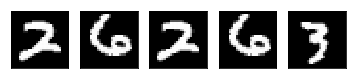

In [ ]:
ix=1
a=(5*np.abs(np.random.rand(5))).astype(int)
predict=np.zeros(5)
actual=np.zeros(5)
fig,ax = plt.subplots()
for i in range(5):
  ax=plt.subplot(1,5,ix)
  ax.set_xticks([])
  ax.set_yticks([])
  im=ax.imshow(images[a[i]][0],cmap='gray')
  _,predicted=torch.max(model1(images)[a[i]],0)
  predict[i]=predicted.item()
  actual[i]=labels[a[i]]
  ix+=1
plt.show
print('Prediction:',predict)
print('Real label:',actual)
print('Images:')

In [ ]:
class CNN2(nn.Module):
    def __init__(self):
      super(CNN2, self).__init__()
      self.flt1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
      self.flt2 = nn.Sequential(
          nn.BatchNorm2d(32),
          nn.MaxPool2d(kernel_size=2, stride=2),
          nn.ReLU())
      self.flt3 = nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1)
      self.flt4 = nn.Sequential(
          nn.BatchNorm2d(32),
          nn.MaxPool2d(kernel_size=2, stride=2),
          nn.ReLU())
      self.flt5 = nn.Sequential(
          nn.Linear(7 * 7 * 32, 500),
          nn.BatchNorm1d(500),
          nn.ReLU(),
          nn.Linear(500, 10),
          nn.BatchNorm1d(10))
       
    def forward(self, x):
      out = self.flt1(x)
      out = self.flt2(out)
      out = self.flt3(out)
      out = self.flt4(out)
      out = out.reshape(out.size(0), -1)
      out = self.flt5(out)
      return out

Epoch 1 out of 5 epochs are over
Epoch 2 out of 5 epochs are over
Epoch 3 out of 5 epochs are over
Epoch 4 out of 5 epochs are over
Epoch 5 out of 5 epochs are over


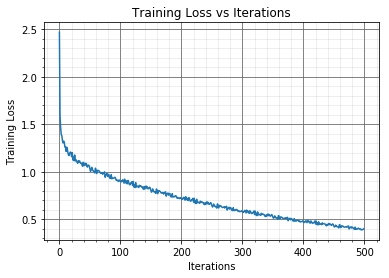

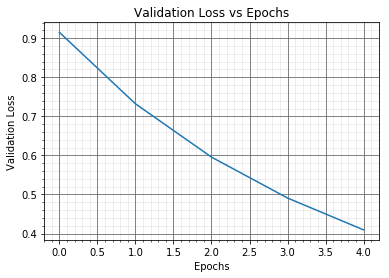

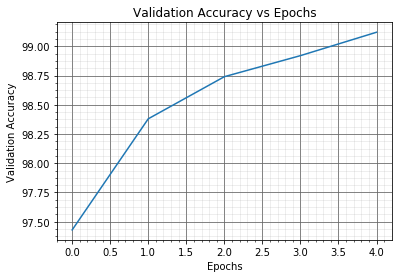

In [ ]:
model2=CNN2()
criterion2 = nn.CrossEntropyLoss()
optimizer2 = torch.optim.Adam(model2.parameters(), lr=LearningRate)

trainingloss_list = []
validationloss_list = []
validationaccuracy_list = []

for epoch in range(epochs):
  for images, labels in trainloader:
      outputs = model2(images.float())
      loss = criterion2(outputs, labels)
      trainingloss_list.append(loss.item())

      optimizer2.zero_grad()
      loss.backward()
      optimizer2.step()

  iteration=0
  tempvalloss=0
  correctval=0    
  
  for images, labels in valloader:
    outputs = model2(images.float())
    loss = criterion2(outputs, labels)
    _, predicted = torch.max(outputs.data, 1)
    correctval += (predicted == labels).sum().item()
    iteration+=1
    tempvalloss+=loss.item()
            
  validationloss_list.append(tempvalloss/iteration)
  validationaccuracy_list.append(correctval/100)
  print('Epoch',epoch+1,'out of',epochs,'epochs are over')
  
plt.figure(1)
xtrainloss=np.arange(len(trainingloss_list))
plt.plot(xtrainloss,trainingloss_list)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.title('Training Loss vs Iterations')

plt.figure(2)
xvalloss=np.arange(len(validationloss_list))
plt.plot(xvalloss,validationloss_list)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Validation Loss vs Epochs')

plt.figure(3)
plt.plot(xvalloss,validationaccuracy_list)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs Epochs')

plt.show()


In [ ]:
model2.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in testloader:
        outputs = model2(images.float())
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format((correct / total) * 100))


torch.save(model2.state_dict(),'/content/drive/My Drive/EE6132/Assignment2/CNN2.cpkt')

Test Accuracy of the model on the 10000 test images: 99.3 %


In [ ]:
model2=CNN2()
model2.load_state_dict(torch.load('/content/drive/My Drive/EE6132/Assignment2/CNN2.cpkt'))
model2.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in testloader:
        outputs = model2(images.float())
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format((correct / total) * 100))

Test Accuracy of the model on the 10000 test images: 99.3 %


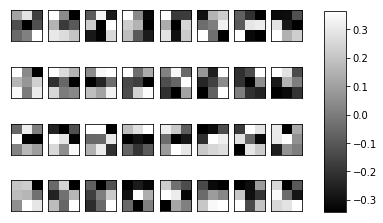

In [ ]:
ix=1
fig,ax=plt.subplots()
for i in range(len(model1.state_dict()['flt1.weight'])):
  ax=plt.subplot(4,8,ix)
  ax.set_xticks([])
  ax.set_yticks([])
  im=ax.imshow(model1.state_dict()['flt1.weight'][i][0],cmap='gray')
  ix+=1
  
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)
plt.show()
  

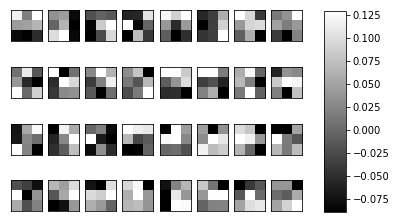

In [ ]:
ix=1
fig,ax = plt.subplots()
for i in range(len(model1.state_dict()['flt3.weight'])):
  ax=plt.subplot(4,8,ix)
  ax.set_xticks([])
  ax.set_yticks([])
  im=ax.imshow(model1.state_dict()['flt3.weight'][i][31],cmap='gray')
  ix+=1
  
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)


plt.show()



Visualizing the First activation layer for a random input


<Figure size 432x288 with 0 Axes>

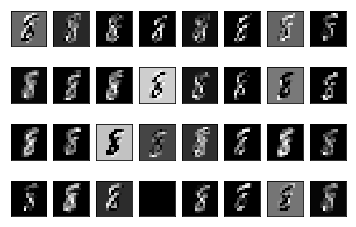

Deeper Activations for the same random input


<Figure size 432x288 with 0 Axes>

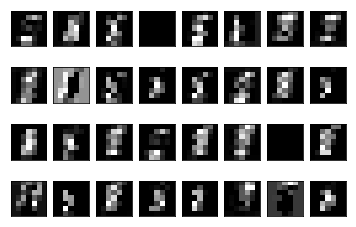

In [ ]:
ix=1
a=np.random.randint(0,len(model1.flt2(model1.flt1(images))))
print('Visualizing the First activation layer for a random input')
plt.figure(1)
fig,ax = plt.subplots()
for i in range(len(model1.flt2(model1.flt1(images))[a])):
  ax=plt.subplot(4,8,ix)
  ax.set_xticks([])
  ax.set_yticks([])
  im=ax.imshow((model1.flt2(model1.flt1(images)))[a][i].detach().numpy(),cmap='gray')
  ix+=1
plt.show()

print('Deeper Activations for the same random input')
ix=1
plt.figure(2)
fig,ax = plt.subplots()
for i in range(len(model1.flt4(model1.flt3(model1.flt2(model1.flt1(images))))[a])):
  ax=plt.subplot(4,8,ix)
  ax.set_xticks([])
  ax.set_yticks([])
  im=ax.imshow(model1.flt4(model1.flt3(model1.flt2(model1.flt1(images))))[a][i].detach().numpy(),cmap='gray')
  ix+=1
plt.show()

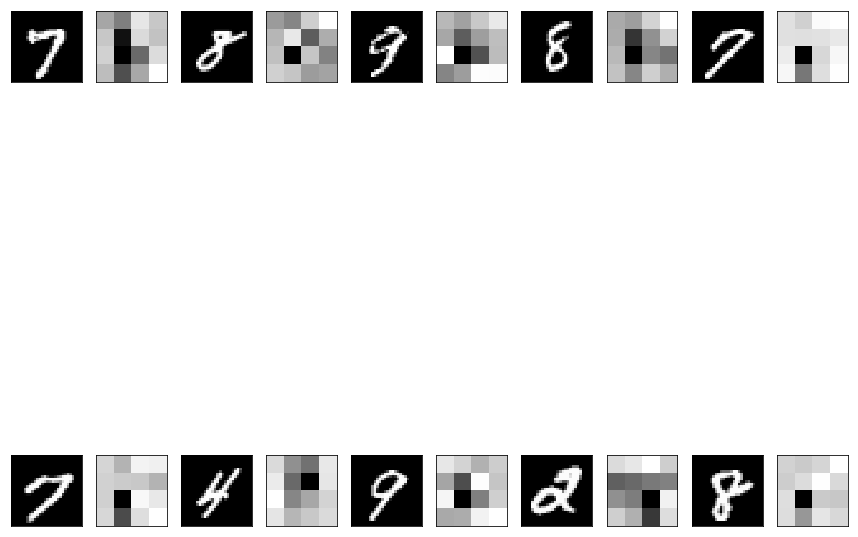

In [ ]:
ranimg=np.random.randint(0,len(images),10)
probablist=np.zeros((4,4))
occ=0.2*torch.ones((7,7))
fig,ax = plt.subplots(2,10,figsize=(15,15))
ix=1
for i in range(10):
  for j in range(4):
    for k in range(4):
      a=images.clone()
      a[ranimg[i],0,j*7:(j+1)*7,k*7:(k+1)*7]=occ
      probablist[j][k]=torch.max(torch.exp(model2(a)[ranimg[i]]/10))/torch.sum(torch.exp(model2(a)[ranimg[i]]/10))
  ax=plt.subplot(2,10,ix)
  ax.set_xticks([])
  ax.set_yticks([])
  ax.imshow(images[ranimg[i]][0],cmap='gray')
  ix+=1
  ax=plt.subplot(2,10,ix)
  ax.imshow(probablist,cmap='gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ix+=1
plt.show()
      

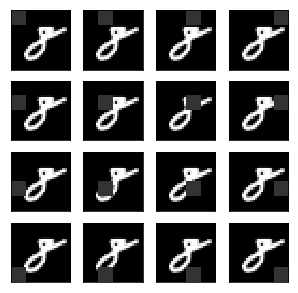

In [ ]:
fig1,ax1 = plt.subplots(4,4,figsize=(5,5))
ix1=1
for j in range(4):
  for k in range(4):
    a=images.clone()
    a[ranimg[1],0,j*7:(j+1)*7,k*7:(k+1)*7]=occ
    ax1=plt.subplot(4,4,ix1)
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.imshow(a[ranimg[1]][0],cmap='gray')
    ix1+=1
plt.show()

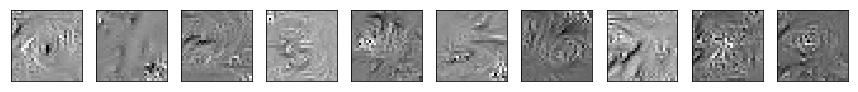

Prediction
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
Confidence
[100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]


In [ ]:
targetclass=np.arange(10)
soft=nn.Softmax(dim=1)
optimizer3=torch.optim.Adam(model2.parameters(), lr=LearningRate)
predictmatrix=np.zeros(10)
confidencematrix=np.zeros(10)
fig,ax=plt.subplots(1,10,figsize=(15,15))
ix=1
losslist=[]
for j in range(10):
  sublosslist=[]
  Xnp=np.random.normal(0.5,0.05,(1,1,28,28))
  for i in range(1000):
    X=torch.from_numpy(Xnp)
    X=X.float()
    X.requires_grad = True
    outputs = model2(X.float())
    loss=outputs[0][targetclass[j]]
    sublosslist.append(loss)
    optimizer3.zero_grad()
    loss.backward()
    y=0.09*X.grad
    y=y.numpy()
    Xnp+=y
  losslist.append(sublosslist)
  ax=plt.subplot(1,10,ix)  
  ax.imshow(Xnp[0][0],cmap='gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ix+=1
  _,predicted=torch.max(model2(X),1)
  predictmatrix[j]=predicted[0]
  confidencematrix[j]=100*torch.max(soft(model2(X))).item()
plt.show()
print('Prediction')
print(predictmatrix)
print('Confidence')
print(confidencematrix)

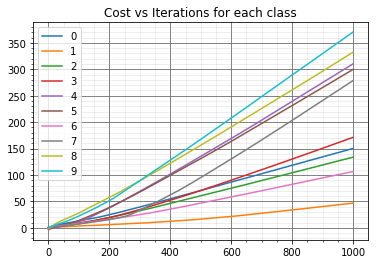

In [ ]:
for i in range(10):
  xloss=np.arange(len(losslist[i]))
  plt.plot(xloss,losslist[i], label = i)
plt.legend()
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.title('Cost vs Iterations for each class' )
plt.show()

In [ ]:
imageset=np.zeros((10,1,28,28))
imageset=torch.from_numpy(imageset)
imageset=imageset.float()
complabel=0
while(complabel<10):
  for images,labels in testloader:
    for i in range(labels.size(0)):
      if(labels[i]==complabel):
        imageset[complabel]=images[i].clone()
        complabel+=1

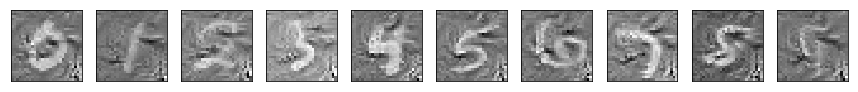

Prediction
[5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]


In [ ]:
criterion3 = nn.CrossEntropyLoss()
targetclass=5
predictmatrix=np.zeros(10)
fig,ax=plt.subplots(10,10,figsize=(15,15))
ix=1
for j in range(10):
  Xnp=np.random.normal(0.5,0.05,(1,1,28,28))
  for i in range(1000):
    X=torch.from_numpy(Xnp)
    X=X.float()
    X.requires_grad = True
    outputs = model2(X.float())
    loss=outputs[0][targetclass]-0.1*torch.sum((X-imageset[j])**2)
    optimizer3.zero_grad()
    loss.backward()
    y=0.01*X.grad
    y=y.numpy()
    Xnp+=y
  ax=plt.subplot(1,10,ix)  
  ax.imshow(Xnp[0][0],cmap='gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ix+=1
  _,predicted=torch.max(model2(X),1)
  predictmatrix[j]=predicted[0]
plt.show()
print('Prediction')
print(predictmatrix)

A random image ( Class = 5 ) + the corresponding noise generated for every class:


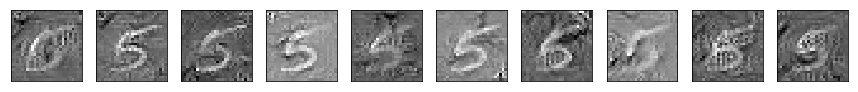

The noise generated for every class(0-9):


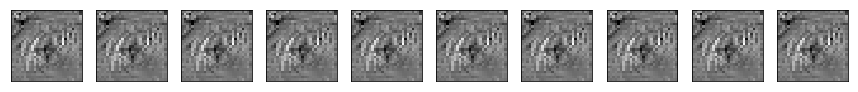

Prediction
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [ ]:
Noisecollection = np.zeros((10,1,28,28))
Noisecollection=torch.from_numpy(Noisecollection)
criterion3 = nn.CrossEntropyLoss()
optimizer3 = torch.optim.Adam(model2.parameters(), lr=LearningRate)
predictmatrix=np.zeros(10)
fig,ax=plt.subplots(1,10,figsize=(15,15))
ix=1
rd=np.random.randint(0,9)
print('A random image ( Class =',rd,') + the corresponding noise generated for every class:')
for j in range(10):
  Nnp=np.zeros((1,1,28,28))
  for i in range(1000):
    N=torch.from_numpy(Nnp)
    N=N.float()
    N.requires_grad = True
    X=imageset[rd]+N
    outputs = model2(X.float())
    loss=outputs[0][j]
    optimizer3.zero_grad()
    loss.backward()
    y=0.0025*N.grad/torch.max(torch.abs(N.grad))
    y=y.numpy()
    Nnp+=y
  ax=plt.subplot(1,10,ix)  
  ax.imshow(X[0][0].detach().numpy(),cmap='gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ix+=1
  Noisecollection[j][0]=N[0].clone()
  _,predicted=torch.max(model2(X),1)
  predictmatrix[j]=predicted[0]
plt.show()

print('The noise generated for every class(0-9):')
fig,ax=plt.subplots(1,10,figsize=(15,15))
ix=1
for i in range(10):
  ax=plt.subplot(1,10,ix)  
  ax.imshow(Noisecollection[0][0].detach().numpy(),cmap='gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ix+=1
plt.show()
print('Prediction')
print(predictmatrix)

In [ ]:
a=images.clone()
correct=0
X = np.zeros((1,1,28,28))
X=torch.from_numpy(X)
for i in range(10):
  predictmatrix=np.zeros(10)
  print('The actual image label is:', labels[i].detach().numpy())
  for j in range(10):
    X[0]=a[i].float()+Noisecollection[j].float()
    _,predict=torch.max(model2(X.float()),1)
    predictmatrix[j]=predict[0]
    if(j==predict[0]):
      correct+=1
  print('Prediction after adding the corresponding noise is:')
  print(predictmatrix)
  print('\n')
  
print('Total Accuracy =', correct)

The actual image label is: 2
Prediction after adding the corresponding noise is:
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


The actual image label is: 3
Prediction after adding the corresponding noise is:
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


The actual image label is: 4
Prediction after adding the corresponding noise is:
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


The actual image label is: 5
Prediction after adding the corresponding noise is:
[0. 5. 2. 3. 4. 5. 6. 7. 8. 9.]


The actual image label is: 6
Prediction after adding the corresponding noise is:
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


The actual image label is: 7
Prediction after adding the corresponding noise is:
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


The actual image label is: 8
Prediction after adding the corresponding noise is:
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


The actual image label is: 9
Prediction after adding the corresponding noise is:
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


The actual image label is: 0
Prediction after adding the corresponding noise is:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  import sys


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch import nn
from skimage.measure import compare_ssim as ssim

transform = transforms.ToTensor()
trainset = datasets.MNIST('', download=True, train=True, transform=transform)
testset = datasets.MNIST('',download=True, train=False, transform=transform)
trainset,valset=torch.utils.data.random_split(trainset,(50000,10000))
trainloader = torch.utils.data.DataLoader(trainset,batch_size=500)
valloader = torch.utils.data.DataLoader(valset,batch_size=500)
testloader = torch.utils.data.DataLoader(testset,batch_size=500)

imageset=np.zeros((10,50,1,28,28))
imageset=torch.from_numpy(imageset)
imageset=imageset.float()
j=np.zeros(10,dtype=int);
while(min(j)<=49):
  for images,labels in trainloader:
    for i in range(labels.size(0)):
      if(j[labels[i]]<50):
        imageset[labels[i]][j[labels[i]]]=images[i].clone()
        j[labels[i]]+=1;

measures=np.zeros((10,10))
labelcount=np.zeros((10,10))
for i in range(10):
  for j in range(50):
    for k in range(10):
      for l in range(50):
        s = ssim(imageset[i][j][0].detach().numpy(),imageset[k][l][0].detach().numpy(), multichannel = False)
        measures[i][k]+=s;
        labelcount[i][k]+=1

a=measures/labelcount
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
c= a/np.max(a)
print(c)

[[0.65 0.18 0.23 0.29 0.24 0.36 0.34 0.26 0.30 0.27]
 [0.18 1.00 0.37 0.38 0.42 0.40 0.40 0.46 0.49 0.46]
 [0.23 0.37 0.43 0.29 0.28 0.25 0.33 0.29 0.34 0.31]
 [0.29 0.38 0.29 0.60 0.27 0.38 0.30 0.25 0.35 0.30]
 [0.24 0.42 0.28 0.27 0.57 0.35 0.37 0.46 0.40 0.53]
 [0.36 0.40 0.25 0.38 0.35 0.47 0.36 0.33 0.41 0.38]
 [0.34 0.40 0.33 0.30 0.37 0.36 0.61 0.31 0.36 0.37]
 [0.26 0.46 0.29 0.25 0.46 0.33 0.31 0.65 0.41 0.55]
 [0.30 0.49 0.34 0.35 0.40 0.41 0.36 0.41 0.59 0.46]
 [0.27 0.46 0.31 0.30 0.53 0.38 0.37 0.55 0.46 0.63]]
